In [2]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\Tyler\Documents\Data_Exploration\colorectal_cancer_dataset.csv")
df


,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167492,167493,USA,69,M,Localized,49,No,Yes,No,Overweight,...,No,Yes,100924,57,13,Rural,Developed,Moderate,Insured,Yes
167493,167494,USA,79,F,Regional,29,Yes,Yes,Yes,Overweight,...,Yes,Yes,90331,39,22,Urban,Developed,Low,Insured,Yes
167494,167495,USA,74,M,Metastatic,62,Yes,Yes,Yes,Normal,...,Yes,Yes,90631,13,19,Urban,Developing,Low,Insured,Yes
167495,167496,UK,68,F,Localized,35,No,Yes,Yes,Normal,...,Yes,No,114385,18,23,Urban,Developed,Moderate,Insured,Yes


In [26]:


num_duplicated = df.duplicated().sum()
print(f"There are {num_duplicated} duplicates in this dataset.")
    

    

There are 0 duplicates in this dataset.


In [24]:

numeric_cols = ['Age', 'Tumor_Size_mm', 'Healthcare_Costs', 'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K']
std_deviation = df[numeric_cols].std()

print("---Standard Deviations---")
print("\n", std_deviation)


---Standard Deviations---

 Age                           11.872470
Tumor_Size_mm                 21.672206
Healthcare_Costs           27402.779597
Incidence_Rate_per_100K       14.447970
Mortality_Rate_per_100K        7.208766
dtype: float64


In [21]:
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

# Print the results
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers detected")


Age: 0 outliers detected
Tumor_Size_mm: 0 outliers detected
Healthcare_Costs: 0 outliers detected
Incidence_Rate_per_100K: 0 outliers detected
Mortality_Rate_per_100K: 0 outliers detected


In [5]:
import numpy as np

missing_values = ["NA", "", None, np.NaN]
missing = df.isin(missing_values).sum()
print(missing)


Patient_ID                    0
Country                       0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Healthcare_Costs              0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Urban_or_Rural                0
Economic_Classification       0
Healthcare_Access             0
Insurance_Status              0
Survival_Prediction           0
dtype: int64


C:\Users\Tyler\AppData\Local\Temp\ipykernel_11152\2004904199.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette="viridis") # Use y for vertical boxplot
C:\Users\Tyler\AppData\Local\Temp\ipykernel_11152\2004904199.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette="viridis") # Use y for vertical boxplot
C:\Users\Tyler\AppData\Local\Temp\ipykernel_11152\2004904199.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette="viridis") # Use y for vertical 

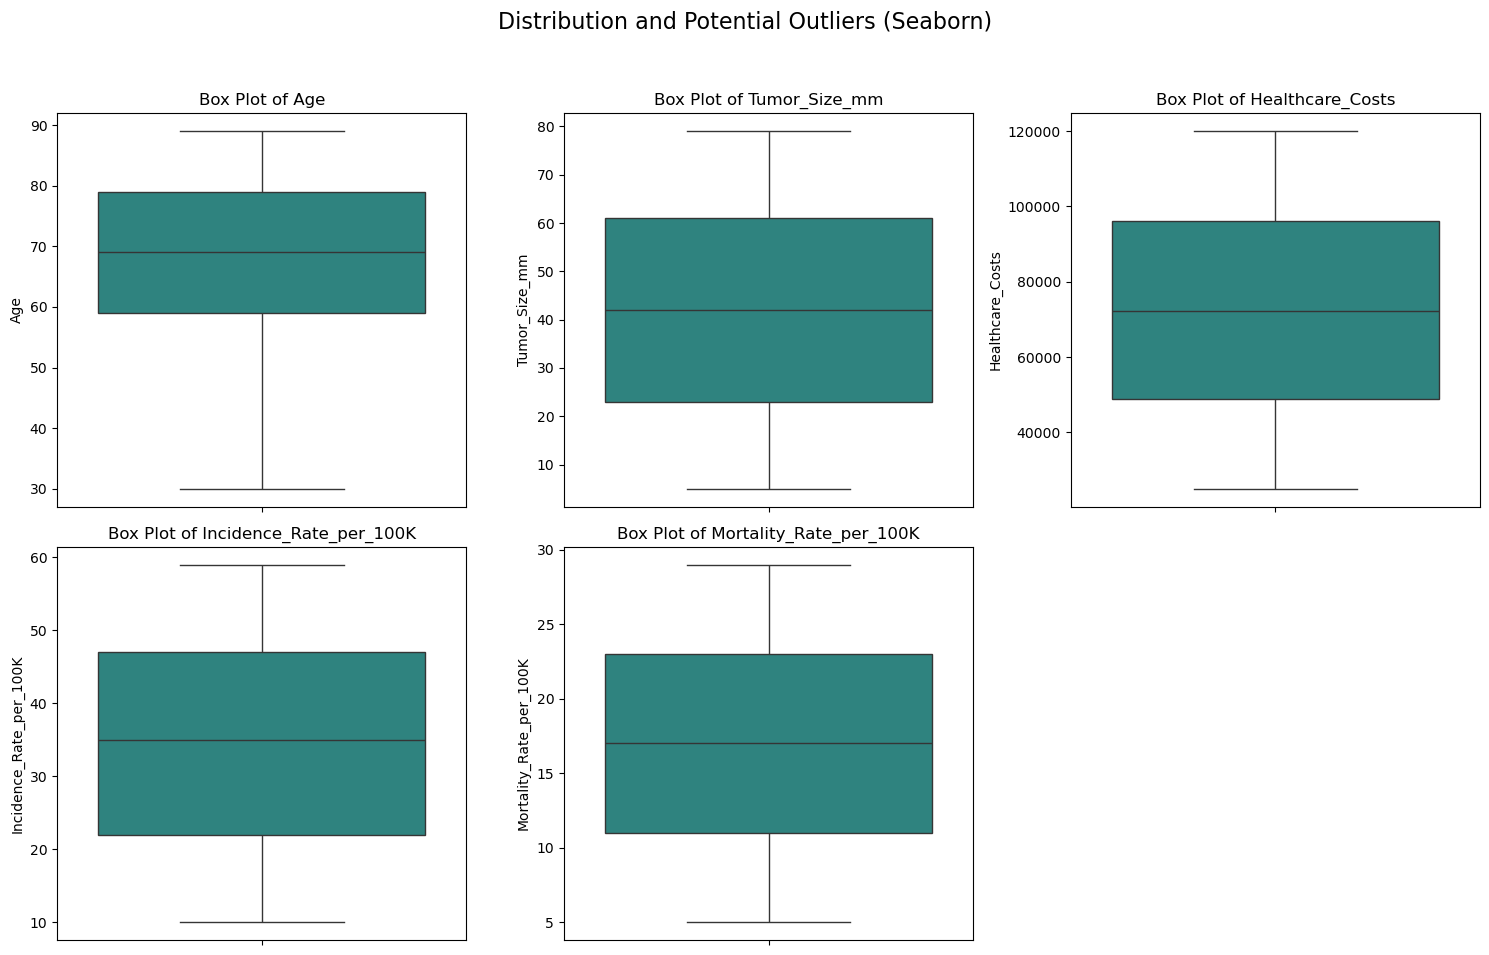

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn

# --- Assume df is loaded correctly ---
# (Same loading code as above)

# --- Define columns ---
columns_to_plot = [
    'Age',
    'Tumor_Size_mm',
    'Healthcare_Costs',
    'Incidence_Rate_per_100K',
    'Mortality_Rate_per_100K'
]

# --- Validate columns (same as above) ---
# ... (validation code) ...

# --- Create the plot using Seaborn ---
n_cols = len(columns_to_plot)
n_rows = (n_cols + 1) // 2 # Or adjust layout as needed
if n_cols <= 3:
     n_rows = 1
     n_cols_layout = n_cols
else:
    n_rows = 2
    n_cols_layout = 3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols_layout, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    # Use seaborn's boxplot function
    sns.boxplot(y=df[col], ax=axes[i], palette="viridis") # Use y for vertical boxplot
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col) # Seaborn often sets this, but good to be explicit
    axes[i].set_xlabel("") # Remove potential x-label if seaborn adds one

# Hide unused subplots
for j in range(i + 1, len(axes)):
     fig.delaxes(axes[j])

fig.suptitle('Distribution and Potential Outliers (Seaborn)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [8]:
germany_data = df[df['Country'] == 'Germany'][['Age', 'Healthcare_Costs']]

average_age_germany = germany_data['Age'].mean()
average_healthcare_cost_germany = germany_data['Healthcare_Costs'].mean()

print(f"Average age from Germany with colorectal cancer is: {int(average_age_germany)}")
print(f"Average healthcare cost in Germany: €{average_healthcare_cost_germany:.2f}")

Average age from Germany with colorectal cancer is: 69
Average healthcare cost in Germany: €72442.36


In [9]:
avgfemale_DE = df[(df['Country'] == 'Germany') & (df['Gender'] == 'F')][['Age', 'Healthcare_Costs']]

avg_female_age = avgfemale_DE['Age'].mean()
avg_female_costs = avgfemale_DE['Healthcare_Costs'].mean()

print(f"The average age of a female from Germany in this dataset is:{int(avg_female_age)}")
print(f"The average healthcare cost for a female in Germany is: {avg_female_costs: .2f}")



The average age of a female from Germany in this dataset is:69
The average healthcare cost for a female in Germany is:  72541.04


In [10]:
avg_male_DE = df[(df['Country'] == 'Germany') & (df['Gender'] == 'M')][['Age', 'Healthcare_Costs']]

avg_male_age = avg_male_DE['Age'].mean()
avg_male_costs = avg_male_DE['Healthcare_Costs'].mean()

print(f"The average age of a male from Germany in this dataset is:{int(avg_male_age)}")
print(f"The average healthcare costs for a male in germany from this dataset is {avg_male_costs: .2f}")

The average age of a male from Germany in this dataset is:69
The average healthcare costs for a male in germany from this dataset is  72376.60


In [11]:
df['Mortality_Rate'] = df['Mortality'].map({'Yes': 1, 'No': 0})


print("---Male Results (Germany)---")
pivot_table_result_male = df[(df['Country'] == 'Germany') & (df['Gender'] == 'M')].pivot_table(
    values=['Age','Healthcare_Costs','Mortality_Rate'], # Use the numeric column
    index='Gender',
    aggfunc='mean'
)

formatted_male = pivot_table_result_male.copy()
formatted_male['Age'] = formatted_male['Age'].round(0).astype(int)
formatted_male['Healthcare_Costs'] = formatted_male['Healthcare_Costs'].round(2)
formatted_male['Mortality_Rate'] = formatted_male['Mortality_Rate'].map('{:.2%}'.format)

print(formatted_male)

print()

print("---Female Results (Germany)---")
pivot_table_result_female = df[(df['Country'] == 'Germany') & (df['Gender'] == 'F')].pivot_table(
    values=['Age','Healthcare_Costs','Mortality_Rate'], # Use the numeric column
    index='Gender',
    aggfunc='mean'
)

formatted_female = pivot_table_result_female.copy()
formatted_female['Age'] = formatted_female['Age'].round(0).astype(int)
formatted_female['Healthcare_Costs'] = formatted_female['Healthcare_Costs'].round(2)
formatted_female['Mortality_Rate'] = formatted_female['Mortality_Rate'].map('{:.2%}'.format)

print(formatted_female)

---Male Results (Germany)---
        Age  Healthcare_Costs Mortality_Rate
Gender                                      
M        69           72376.6         39.25%

---Female Results (Germany)---
        Age  Healthcare_Costs Mortality_Rate
Gender                                      
F        69          72541.04         39.90%


In [12]:
country_counter = df['Country'].value_counts()
print(country_counter)

Country
USA             25927
China           17525
South Korea     14107
Japan           13924
UK              12276
Germany         12258
India           10479
France          10426
Brazil          10399
Canada           8819
Italy            8795
Australia        6877
South Africa     5172
Nigeria          3551
Pakistan         3549
New Zealand      3413
Name: count, dtype: int64


C:\Users\Tyler\AppData\Local\Temp\ipykernel_11152\4064687686.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='rocket_r') # Use seaborn for barplot


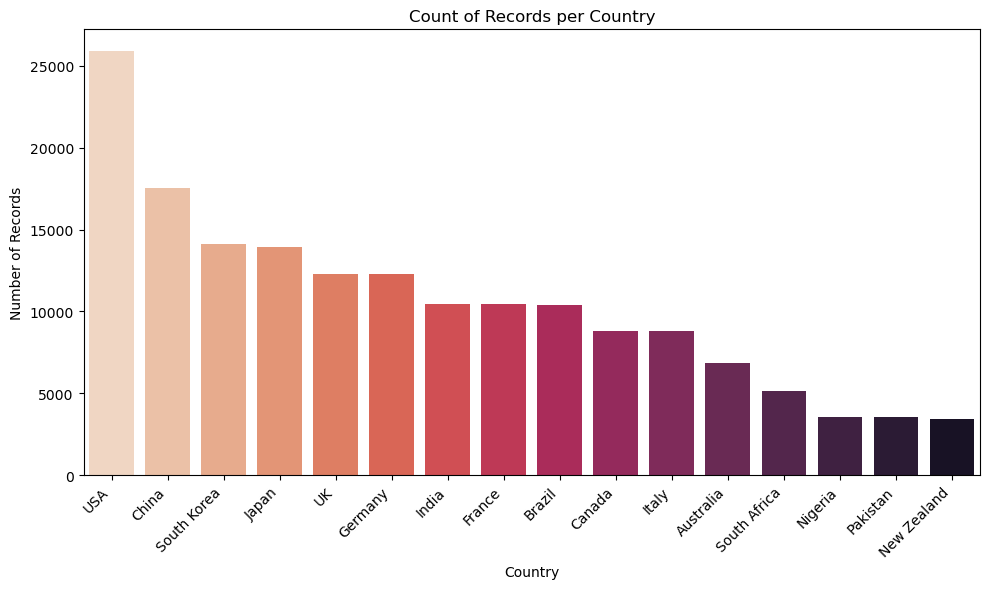

In [13]:
import pandas as pd
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Seaborn often makes plots look nicer

# Assume 'df' is your pre-existing DataFrame

# Count the occurrences of each country
country_counts = df['Country'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6)) # Set the figure size for better readability
sns.barplot(x=country_counts.index, y=country_counts.values, palette='rocket_r') # Use seaborn for barplot

# Add titles and labels
plt.title('Count of Records per Country')
plt.xlabel('Country')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if country names are long
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()

C:\Users\Tyler\AppData\Local\Temp\ipykernel_11152\3744522670.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
C:\Users\Tyler\AppData\Local\Temp\ipykernel_11152\3744522670.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.1%}'.format(x) for x in locs])


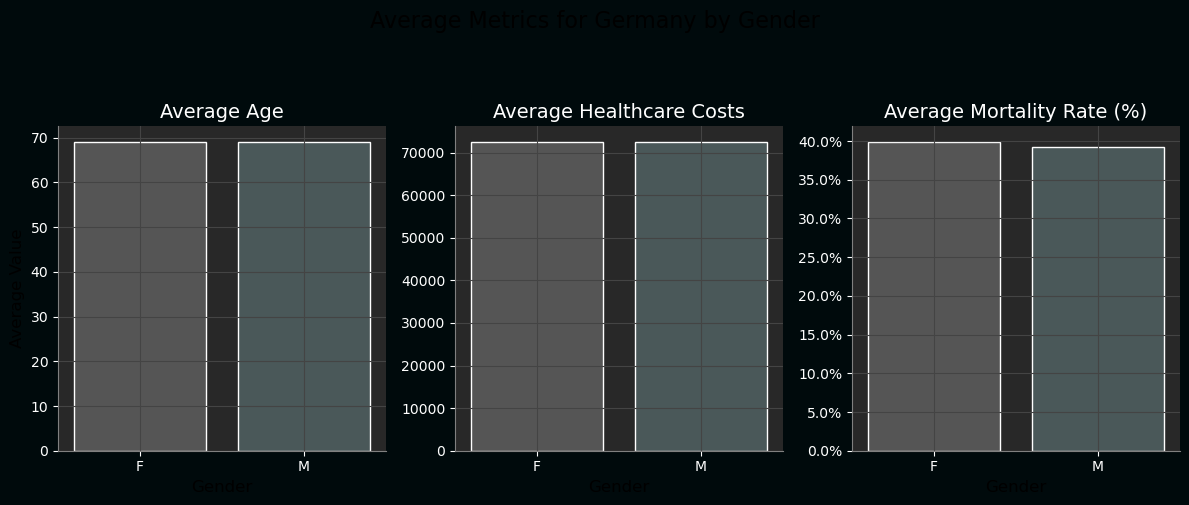

In [14]:



df['Mortality_Rate'] = df['Mortality'].map({'Yes': 1, 'No': 0})

df_germany = df[df['Country'] == 'Germany'].copy()


pivot_table_germany = df_germany.pivot_table(
    values=['Age', 'Healthcare_Costs', 'Mortality_Rate'],
    index='Gender',
    aggfunc='mean'
).reset_index() 

# Melt the DataFrame to long-form for Seaborn
melted_df = pivot_table_germany.melt(
    id_vars='Gender',
    value_vars=['Age', 'Healthcare_Costs', 'Mortality_Rate'],
    var_name='Metric',
    value_name='Average Value'
)

# --- Create the Seaborn visualization ---
# Use catplot to create a figure with multiple plots (facets)
# Keep a palette for overall theme, but we will override specific bars
g = sns.catplot(
    data=melted_df,
    x='Gender',
    y='Average Value',
    col='Metric',
    kind='bar',
    palette='rocket', # Example: keep a dark-themed palette for 'M'
    height=5,
    aspect=0.8,
    sharey=False, # Keep separate y-axes because scales are very different
    edgecolor='gray' # Add edge color to bars for definition
)

# --- Start of Dark Aesthetic and Clarity Adjustments (from previous) ---

# Define background colors
figure_bg_color = '#000a0c' # Very dark gray for figure
plot_bg_color = '#282828'   # Slightly lighter dark gray for plot area
dark_gray_bar_color = '#555555' # The dark gray color for 'F' bars
m_bar_color = '#4A5859'

# Set the background color for the entire figure
g.fig.patch.set_facecolor(figure_bg_color)


# Add titles and labels with increased font size and white color for clarity
g.fig.suptitle('Average Metrics for Germany by Gender', y=1.03, fontsize=16, color='black') # Main title

# Set axis labels with increased font size
g.set_axis_labels("Gender", "Average Value", fontsize=12, color='black')

# Improve clarity of facet titles and tick labels
new_titles = {
    'Age': 'Average Age',
    'Healthcare_Costs': 'Average Healthcare Costs',
    'Mortality_Rate': 'Average Mortality Rate (%)'
}

# --- Change 'F' bars to dark gray and apply other formatting ---
for ax, metric in zip(g.axes.flat, melted_df['Metric'].unique()):
     # Set the background color of each plot (Axes)
     ax.patch.set_facecolor(plot_bg_color)
     ax.grid(color='#444444') # Darker grid lines

     # Set facet title
     ax.set_title(new_titles[metric], fontsize=14, color='white')

     # Increase tick label font size and set color
     ax.tick_params(axis='both', which='major', labelsize=10, colors='white')

     # Ensure spine colors match for dark theme
     ax.spines['bottom'].set_color('gray')
     ax.spines['left'].set_color('gray')
     ax.spines['top'].set_color('gray')
     ax.spines['right'].set_color('gray')

     # Apply percentage formatting to the Mortality Rate y-axis specifically
     if metric == 'Mortality_Rate':
         locs = ax.get_yticks()
         if len(locs) > 0: # Avoid error if no ticks
             ax.set_yticklabels(['{:.1%}'.format(x) for x in locs])


     xticks = ax.get_xticks()
     xticklabels = [t.get_text() for t in ax.get_xticklabels()]

     # Iterate over the bars (patches) in the current axis
     for patch in ax.patches:
         # Get the center x-position of the bar
         patch_center_x = patch.get_x() + patch.get_width() / 2

         # Find which x-tick label this center position is closest to
         closest_xtick_index = min(range(len(xticks)), key=lambda i: abs(xticks[i] - patch_center_x))
         corresponding_label = xticklabels[closest_xtick_index]

         if corresponding_label == 'F':
             patch.set_facecolor(dark_gray_bar_color)
             patch.set_edgecolor('white')
         if corresponding_label == 'M':
             patch.set_facecolor(m_bar_color)
             patch.set_edgecolor('white') 
# --- End bar coloring and formatting loop ---


# Adjust layout to prevent titles/labels overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle

# Show the plot
plt.show()

# Optional: Reset matplotlib style to default if you plot more things later
# Note: This won't undo the specific facecolor settings made above, only the general style
# plt.style.use('default') # Keeping dark style might be preferred for consistency

In [15]:
totalcost = df['Healthcare_Costs'].sum()
print(totalcost)

12135520800


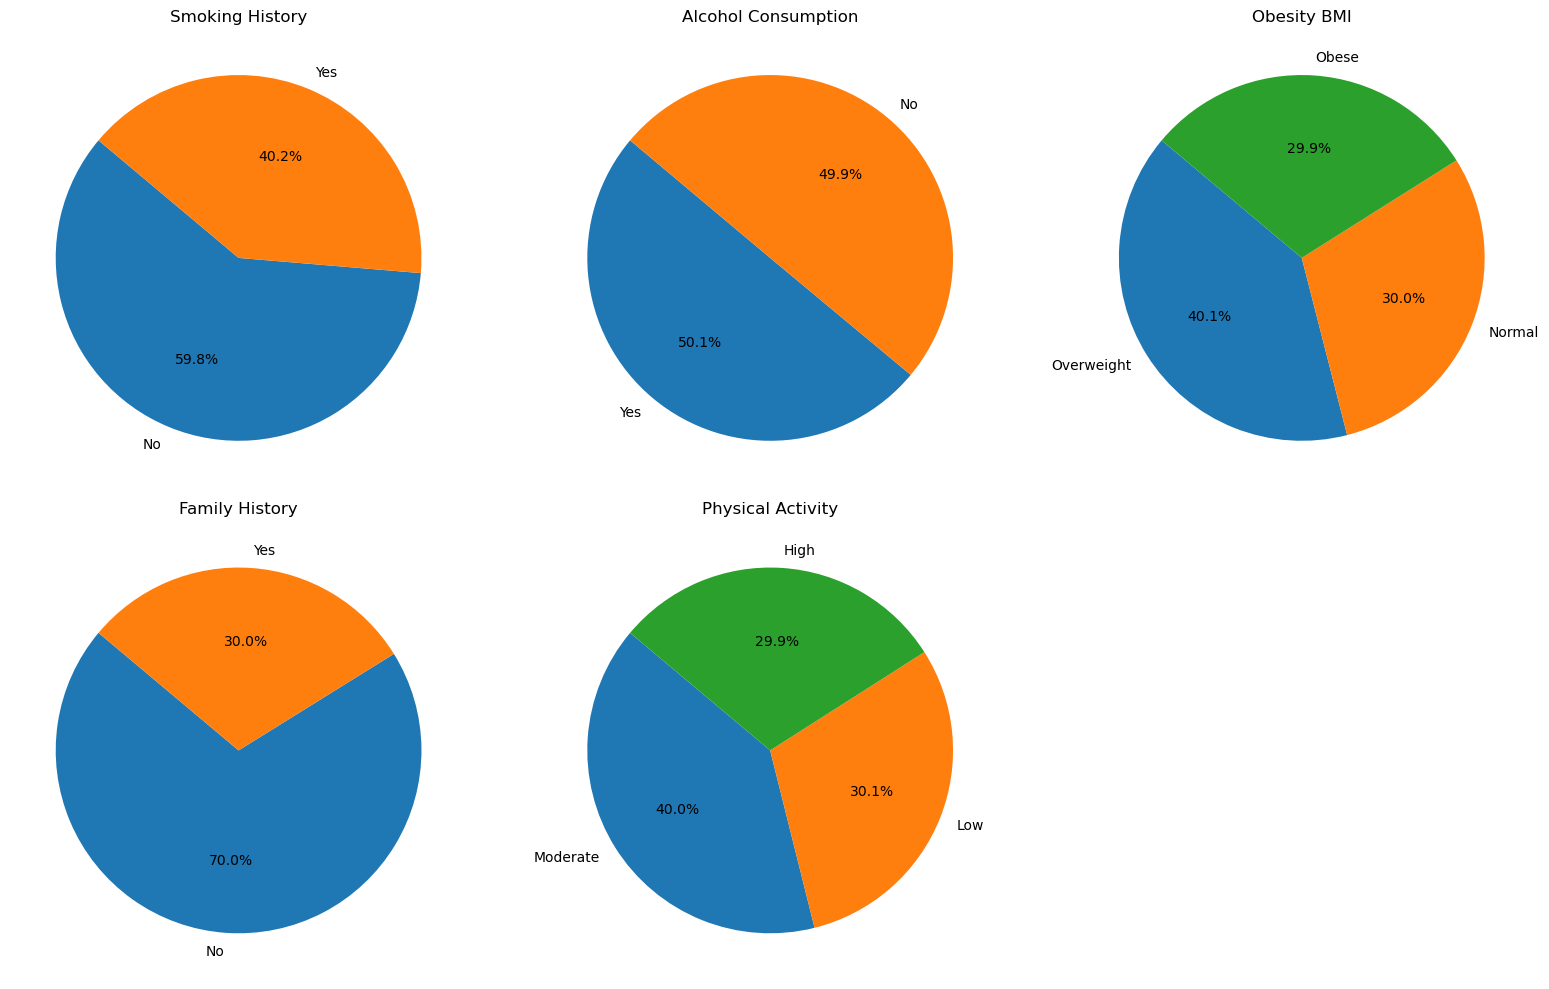

In [16]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()


risk_factors = ['Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI',
                'Family_History', 'Physical_Activity']


for i, col in enumerate(risk_factors):
    counts = df[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(col.replace('_', ' '))

# Hide the last subplot (6th slot unused)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [17]:
# Map 'Mortality' to binary: Yes = 1, No = 0
df['Mortality_Flag'] = df['Mortality'].map({'Yes': 1, 'No': 0})

# Calculate mortality percentage
mortality_percentage = df['Mortality_Flag'].mean() * 100
mortality_percentage

40.08609109416885

In [18]:
glob = df['Healthcare_Costs'].mean()
print(glob)

72452.1680985331
